In [1]:
# importing libraries 

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline


In [3]:
# loading and preparing data
# import dataset and split into train and test

mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()




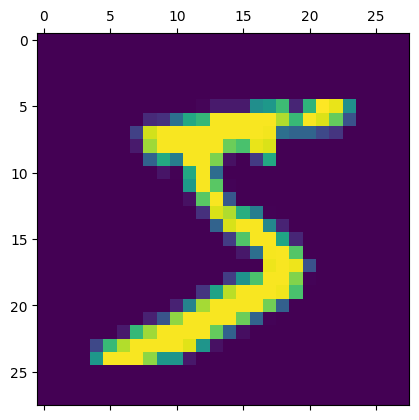

In [4]:
#to see how first image looks

plt.matshow(x_train[0])

In [5]:
#normalising the images by scaling the pixel intensities to the range 0 to 1

x_train = x_train / 255
x_test = x_test / 255

In [6]:
# creating the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile the model

model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# train the model

history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6298 - accuracy: 0.8462 - val_loss: 0.3542 - val_accuracy: 0.9042
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3321 - accuracy: 0.9088 - val_loss: 0.2866 - val_accuracy: 0.9216
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9205 - val_loss: 0.2537 - val_accuracy: 0.9302
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9291 - val_loss: 0.2327 - val_accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2291 - accuracy: 0.9359 - val_loss: 0.2122 - val_accuracy: 0.9393
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - accuracy: 0.9407 - val_loss: 0.1982 - val_accuracy: 0.9457
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1962 - accuracy: 0.9448 - val_loss: 0.1845 - val_accuracy:

In [10]:
# evaluate the model

test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9557
Loss = 0.157
Accuracy = 0.956


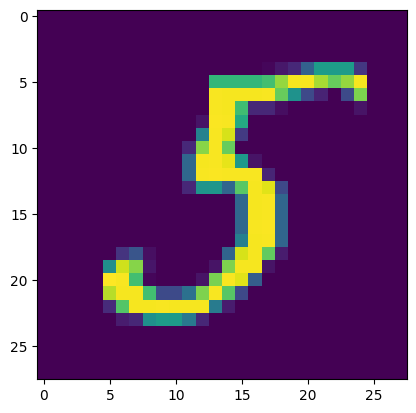

In [11]:
# making predicion on new data

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()



In [12]:
# confusion matrix

test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)


313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 964    0    1    2    0    4    6    2    1    0]
 [   0 1122    2    2    0    1    3    2    3    0]
 [   5    2  974   10    7    1    6   12   12    3]
 [   0    1    5  974    0    4    0   12   11    3]
 [   1    0    3    1  940    0    8    3    3   23]
 [   9    1    0   22    2  832    8    3    9    6]
 [  10    3    3    3    8    8  920    1    2    0]
 [   1    9   17    5    4    1    0  977    1   13]
 [   4    4    3   15    4    8    9   10  913    4]
 [   7    7    1   11   19    4    1   12    6  941]], shape=(10, 10), dtype=int32)
